In [2]:
#Business Understanding
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read CSV Data 
train_df = pd.read_csv("monthly_salary_brazil.csv")
train_df.head()

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
0,1,OFICIAL ADMINISTRATIVO,DETRAN,2315.81,0.0,0.0,0.0,73.85,0.0,1929.34,NaN
1,2,SD 2C PM,PM,3034.05,0.0,0.0,0.0,651.82,0.0,2265.96,NaN
2,3,1TEN PM,PM,8990.98,0.0,0.0,0.0,626.75,0.0,6933.04,NaN
3,4,MAJ PM,SPPREV,13591.02,0.0,0.0,0.0,0.00,0.0,10568.36,NaN
4,5,AG.TEC. DE ASSIT. A SAUDE,HCFMUSP,4203.67,0.0,0.0,0.0,0.00,0.0,3561.88,NaN


In [24]:
#Data Preparing
#Null Values if there are need to replaced with null values
 """Null values are dropped using method dropna if found any ""
miss_data = train_df.isnull().sum()
miss_data

Id                       0
job                     28
sector                   0
Month_salary             0
13_salary                0
eventual_salary          0
indemnity                0
extra_salary             0
discount_salary          0
total_salary             0
Unnamed: 10        1047701
dtype: int64

In [37]:
# Check for invalid salaries
zer_salary = train_df['13_salary']<=0
invalid_salary = train_df[zer_salary]

invalid_salary

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
0,1,OFICIAL ADMINISTRATIVO,DETRAN,0,0.0,0.0,0.0,73.85,0.0,1929.34,NaN
1,2,SD 2C PM,PM,0,0.0,0.0,0.0,651.82,0.0,2265.96,NaN
2,3,1TEN PM,PM,0,0.0,0.0,0.0,626.75,0.0,6933.04,NaN
3,4,MAJ PM,SPPREV,0,0.0,0.0,0.0,0.00,0.0,10568.36,NaN
4,5,AG.TEC. DE ASSIT. A SAUDE,HCFMUSP,0,0.0,0.0,0.0,0.00,0.0,3561.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571,PROFESSOR EDUCACAO BASICA II,SPPREV,0,0.0,0.0,0.0,0.00,0.0,3311.64,NaN
1048571,1048572,AGENTE DE ORGANIZACAO ESCOLAR,SPPREV,0,0.0,0.0,0.0,0.00,0.0,711.89,NaN
1048572,1048573,PROFESSOR EDUCACAO BASICA II,EDUCACAO,0,0.0,0.0,0.0,0.00,0.0,3448.16,NaN
1048573,1048574,BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,SPPREV,0,0.0,0.0,0.0,0.00,0.0,1412.14,NaN


In [42]:
trai_data = train_df.drop(invalid_salary.index.tolist())
# Check shape of new dataframe
trai_data.shape

(115782, 11)

In [45]:
# Reset index numbers
trai_data.reset_index(drop=True, inplace=True)
# View last 5 rows to verify index is reset
trai_data.tail()

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
115777,1048433,PROFESSOR EDUCACAO BASICA II,SPPREV,0,1633.63,0.0,0.0,0.0,0.0,3717.54,NaN
115778,1048435,BENEFICIARIO DA POLICIA MILITAR - CBPM,SPPREV,0,1341.35,0.0,0.0,0.0,0.0,6656.12,NaN
115779,1048480,BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,SPPREV,0,757.79,0.0,0.0,0.0,0.0,1951.35,NaN
115780,1048494,PROFESSOR EDUCACAO BASICA I,SPPREV,0,1821.46,0.0,0.0,0.0,0.0,4419.57,NaN
115781,1048557,PROFESSOR EDUCACAO BASICA I,SPPREV,0,1109.79,0.0,0.0,0.0,0.0,3244.86,NaN


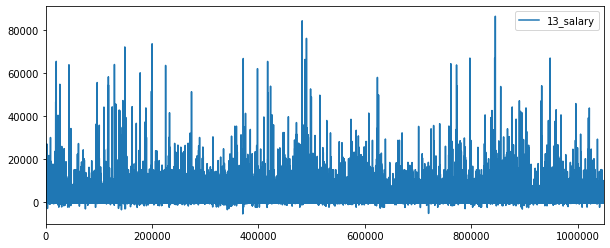

In [46]:
train_df['13_salary'].plot(legend=True, figsize=(10,4))

In [ ]:
width = 10
height = 10
plt.figure(figsize=(width, height))
sns.residplot(train_df['job'], trai_data['13_salary'])
plt.show()

In [35]:
train_df.nunique()

Id                 1048575
job                   3418
sector                  90
Month_salary             1
13_salary            56042
eventual_salary      48251
indemnity             1767
extra_salary         48653
discount_salary       8560
total_salary        499658
Unnamed: 10            849
dtype: int64

In [131]:


import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
train_df.head(100)


,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
844,845,TEC MANUT.,PROJETOS E OBRAS,CPTM,3861.03,9538.26,41.81,0.0,0.0,0.0,11782.06
846,847,TEC MANUT.,PROJETOS E OBRAS,CPTM,4179.02,0.00,0.00,0.0,0.0,0.0,3516.23
1687,1688,TEC MANUT.,PROJETOS E OBRAS,CPTM,8927.72,0.00,0.00,0.0,0.0,0.0,6442.55
2310,2311,TEC MANUT.,PROJETOS E OBRAS,CPTM,5932.71,0.00,0.00,0.0,0.0,0.0,4519.46
3667,3668,TEC MANUT.,PROJETOS E OBRAS,CPTM,9922.34,0.00,0.00,0.0,0.0,0.0,7670.79
...,...,...,...,...,...,...,...,...,...,...,...
121139,121140,TEC MANUT.,PROJETOS E OBRAS,CPTM,5432.73,0.00,0.00,0.0,0.0,0.0,4281.47
121182,121183,TEC MANUT.,PROJETOS E OBRAS,CPTM,5249.02,0.00,484.53,0.0,0.0,0.0,4345.07
121333,121334,TEC MANUT.,PROJETOS E OBRAS,CPTM,7289.73,0.00,0.00,0.0,0.0,0.0,5112.03
122653,122654,TEC MANUT.,PROJETOS E OBRAS,CPTM,5767.05,0.00,5.57,0.0,0.0,0.0,4471.69


In [128]:

train_df.columns

Index(['Id', 'job', 'sector', 'Month_salary', '13_salary', 'eventual_salary',
       'indemnity', 'extra_salary', 'discount_salary', 'total_salary',
       'Unnamed: 10'],
      dtype='object')

In [129]:
def month_Salary(salary):

    month_Salary = train_df.sort_values(by = [Month_salary], ascending=True)
    month_Salary.head(5)
    return month_Salary
    

In [94]:
    #What are the top 100 employees with highest  13_salary ?
    Open_s = train_df.sort_values(by = ['13_salary'], ascending=False)
    Open_s.head(100)
    

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
845178,845179,ENGENHEIRO 28,SABESP,0,86381.12,0.00,0.0,115174.83,0.0,172863.12,NaN
482179,482180,ENGENHEIRO 28,SABESP,0,84265.66,0.00,0.0,112354.21,0.0,183274.02,NaN
490258,490259,ENGENHEIRO 28,SABESP,0,76130.05,0.00,0.0,101506.74,0.0,171776.41,NaN
200208,200209,ASSESSOR TECNICO IV,METRO,0,73601.68,1649.44,0.0,0.00,0.0,81387.59,NaN
148909,148910,GERENTE,METRO,0,72140.79,1482.09,0.0,0.00,0.0,80567.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...
47594,47595,ENGENHEIRO ESPECIALIZADO,METRO,0,34307.39,1105.74,0.0,0.00,0.0,34227.91,NaN
356589,356590,TECNICO EM GESTAO 21,SABESP,0,34283.55,0.00,0.0,0.00,0.0,26989.57,NaN
868028,868029,ANALISTA DE GESTAO 06,SABESP,0,34201.70,0.00,0.0,0.00,0.0,34284.53,NaN
724403,724404,SUPERVISOR CONTROLE ADMINIST,METRO,0,34179.44,919.25,0.0,0.00,0.0,34481.36,NaN


In [76]:
    #What are the top 100 employees with highest  total_salary ?

    Open_s = train_df.sort_values(by = ['total_salary'], ascending=False)
    Open_s.head(100)


,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary,Unnamed: 10
83761,83762,DELEGADO POLICIA CL.ESPECIAL,SPPREV,0,0.00,0.00,327498.03,0.00,-453.70,342151.20,NaN
271705,271706,AGENTE FISCAL DE RENDAS,SPPREV,0,0.00,14342.52,302834.70,82.49,-23820.03,328078.89,NaN
533088,533089,AGENTE FISCAL DE RENDAS,SPPREV,0,0.00,15366.76,270388.12,83.28,-21006.58,291929.51,NaN
920531,920532,AGENTE FISCAL DE RENDAS,SPPREV,0,0.00,10944.66,248757.07,60.67,-13325.77,271131.22,NaN
25808,25809,AGENTE FISCAL DE RENDAS,SPPREV,0,0.00,13086.78,237941.55,72.97,-25969.63,261618.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...
98788,98789,AGENTE FISCAL DE RENDAS,SPPREV,0,0.00,43262.10,0.00,0.00,-17213.37,61405.56,NaN
667220,667221,TECNICO DA FAZENDA ESTADUAL,SPPREV,0,0.00,0.00,57523.41,0.00,0.00,61382.58,NaN
843157,843158,ENGENHEIRO 13,SABESP,0,24145.67,0.00,0.00,46681.62,0.00,61324.67,NaN
959152,959153,CAP PM,PM,0,1326.81,58654.32,0.00,401.12,0.00,60869.28,NaN


In [82]:
def adder(ele1,ele2):
   return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['13_salary','extra_salary','total_salary'])
df.pipe(adder,2)

,13_salary,extra_salary,total_salary
0,2.092172,3.734768,2.274006
1,1.351460,1.010764,2.303703
2,3.571373,3.237486,1.308405
3,4.016690,2.927072,0.565746
4,2.131918,2.580185,1.580176


In [84]:
df = pd.DataFrame(np.random.randn(5,3),columns=['13_salary','extra_salary','total_salary'])
df.apply(np.mean)


13_salary       0.406037
extra_salary    0.772830
total_salary   -0.047728
dtype: float64

In [85]:
df = pd.DataFrame(np.random.randn(5,3),columns=['13_salary','extra_salary','total_salary'])
df.apply(lambda x: x.max() - x.min())

13_salary       2.723029
extra_salary    3.151440
total_salary    1.638630
dtype: float64

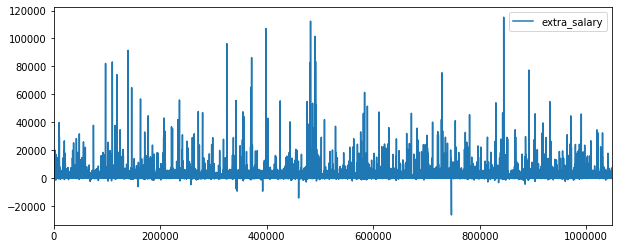

In [87]:
train_df['extra_salary'].plot(legend=True, figsize=(10,4))

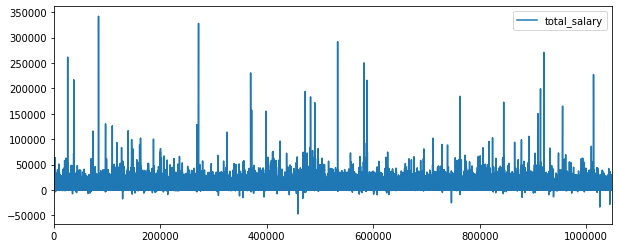

In [88]:
train_df['total_salary'].plot(legend=True, figsize=(10,4))

In [150]:
train_df = pd.read_csv("monthly_salary_brazil.csv")
before = train_df.dtypes 
   
train_df.dropna(inplace = True) 
train_df["extra_salary"]= train_df["extra_salary"].astype(int) 
after = train_df.dtypes 
# View inputs and outputs of training variables
print("BEFORE CONVERSION\n", before, "\n") 
print("AFTER CONVERSION\n", after, "\n") 

BEFORE CONVERSION
 Id                   int64
job                 object
sector              object
Month_salary        object
13_salary          float64
eventual_salary    float64
indemnity          float64
extra_salary       float64
discount_salary    float64
total_salary       float64
Unnamed: 10        float64
dtype: object 

AFTER CONVERSION
 Id                   int64
job                 object
sector              object
Month_salary        object
13_salary          float64
eventual_salary    float64
indemnity          float64
extra_salary         int32
discount_salary    float64
total_salary       float64
Unnamed: 10        float64
dtype: object 



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


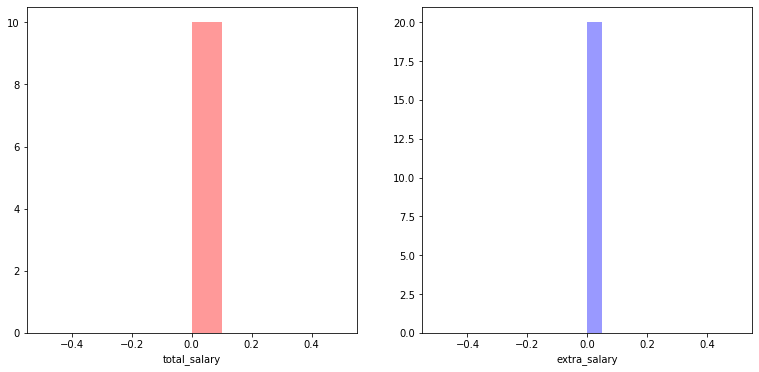

In [149]:
plt.figure(figsize = (13, 6))
plt.subplot(1,2,1)
sns.distplot(train_df.total_salary,bins=10,color = 'r')
plt.subplot(1,2,2)
sns.distplot(train_df.extra_salary, bins=20,color = 'b')
plt.show()

In [171]:
# Assign salary to "y" and all other features to "X". Split into training and testing variables.
#Model Preparing
X = train_df.iloc[:, -7:-1].values
y = train_df.iloc[:, 8].values
#Split the Dataset to train and test
#Split into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Fitting LinearRegression to Training Set
linear = LinearRegression()
linear.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:

#predicting with Test Set
z = linear.predict(X_train)
print("The output of the first five predicted values are:", z[0:5])



The output of the first five predicted values are: [ 1.12080806e-14 -2.06780272e-14  1.38020786e-13 -1.98468365e-14
 -3.56795235e-14]
